In [28]:
# !pip install import_ipynb 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

**Metadata**

This comprehensive set of fields will guide your analysis, helping you unravel the intricacies of client behavior and preferences.

    * client_id: Every client’s unique ID.
    * variation: Indicates if a client was part of the experiment.
    * visitor_id: A unique ID for each client-device combination.
    * visit_id: A unique ID for each web visit/session.
    * process_step: Marks each step in the digital process.
    * date_time: Timestamp of each web activity.
    * clnt_tenure_yr: Represents how long the client has been with Vanguard, measured in years.
    * clnt_tenure_mnth: Further breaks down the client’s tenure with Vanguard in months.
    * clnt_age: Indicates the age of the client.
    * gendr: Specifies the client’s gender.
    * num_accts: Denotes the number of accounts the client holds with Vanguard.
    * bal: Gives the total balance spread across all accounts for a particular client.
    * calls_6_mnth: Records the number of times the client reached out over a call in the past six months.
    * logons_6_mnth: Reflects the frequency with which the client logged onto Vanguard’s platform over the last six months.


In [30]:
all_data = pd.read_csv("all_data.csv")
all_data.head(5)

C:\Users\PapaYaga\AppData\Local\Temp\ipykernel_12016\3258300398.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data = pd.read_csv("all_data.csv")


,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
1,1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
2,2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
3,3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
4,4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test


In [31]:
def clean_dtypes(df):

    for col in df.columns:
        try:
            if (df[col].dtypes == "int64") & ("_id" not in col):
                df[col].fillna(df[col].mean(), inplace=True)
            elif df[col].dtypes == "float64":
                df[col].fillna(df[col].mean().round(2), inplace=True)
            elif (df[col].dtypes == "O") & ("Variation" not in col):
                df[col].fillna(df[col].mode()[0], inplace=True)
        except Exception as e:
            print(f"{e} during {col}")
    
    df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
    df["date_time"] = pd.to_datetime(df["date_time"])
    df["clnt_tenure_yr"] = df["clnt_tenure_yr"].astype(int)
    df["clnt_tenure_mnth"] = df["clnt_tenure_mnth"].astype(int)
    df["clnt_age"] = df["clnt_age"].apply(np.ceil).astype(int)
    df["gendr"] = df["gendr"].apply(lambda x: "U" if "X" in x else x)
    df["num_accts"] = df["num_accts"].astype(int)
    df["calls_6_mnth"] = df["calls_6_mnth"].astype(int)
    df["logons_6_mnth"] = df["logons_6_mnth"].astype(int)
    return df

In [32]:
all_data = clean_dtypes(all_data)

In [33]:
all_data.head(3)

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5,64,79,U,2,189023.86,1,4,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5,64,79,U,2,189023.86,1,4,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5,64,79,U,2,189023.86,1,4,Test


In [49]:
correlation_matrix = all_data.select_dtypes("number").corr().round(3)

In [50]:
correlation_matrix_annot = correlation_matrix.map(lambda x: "Low" if x <= 0.2 else "Moderate" if x < 0.5 and x > 0.2 else "High")

In [53]:
correlation_matrix_annot

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
client_id,High,Low,Low,Low,Low,Low,Low,Low
clnt_tenure_yr,Low,High,High,Moderate,Low,Low,Low,Low
clnt_tenure_mnth,Low,High,High,Moderate,Low,Low,Low,Low
clnt_age,Low,Moderate,Moderate,High,Low,Moderate,Low,Low
num_accts,Low,Low,Low,Low,High,Moderate,Moderate,Moderate
bal,Low,Low,Low,Moderate,Moderate,High,Low,Low
calls_6_mnth,Low,Low,Low,Low,Moderate,Low,High,High
logons_6_mnth,Low,Low,Low,Low,Moderate,Low,High,High


<Axes: >

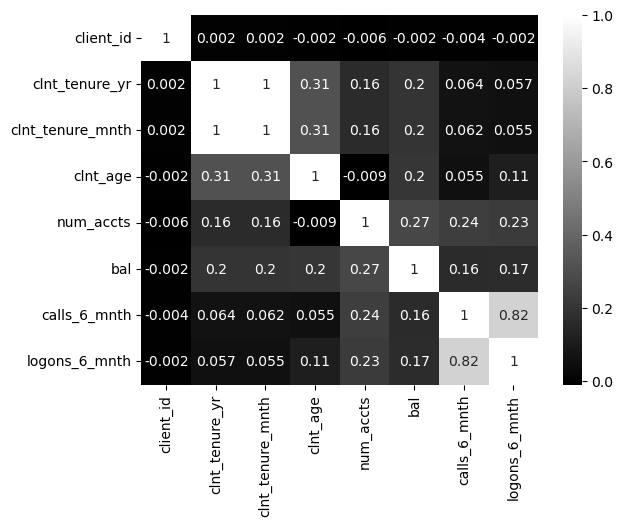

In [56]:
sns.heatmap(correlation_matrix, annot=True, cmap="gray")